In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Pressures

In [448]:
data=np.load("pressures1.npy")
print(data.shape)
col1=data[:,0][0]
col1_x=data[:,1][0]
col2=data[:,0][1]
col2_x=data[:,1][1]
col3=data[:,0][2]
col3_x=data[:,1][2]
col4=data[:,0][3]
col4_x=data[:,1][3]
col5=data[:,0][4]
col5_x=data[:,1][4]

def range_(col):
    return np.round(np.max(col)-np.min(col),2)

print("average",np.round(np.average(col1),2),"&",np.round(np.average(col2),2),"&",np.round(np.average(col3),2),"&",np.round(np.average(col4),2),"&",np.round(np.average(col5),2))
print("median",np.round(np.median(col1),2),"&",np.round(np.median(col2),2),"&",np.round(np.median(col3),2),"&",np.round(np.median(col4),2),"&",np.round(np.median(col5),2))
print("range",np.round(range_(col1),2),"&",np.round(range_(col2),2),"&",np.round(range_(col3),2),"&",np.round(range_(col4),2),"&",np.round(range_(col5),2))
print("std",np.round(np.std(col1),2),"&",np.round(np.std(col2),2),"&",np.round(np.std(col3),2),"&",np.round(np.std(col4),2),"&",np.round(np.std(col5),2))

(30, 2, 5)
average 51.65 & 55.62 & 54.72 & 48.4 & 57.4
median 50.7 & 57.18 & 51.79 & 46.77 & 54.06
range 37.74 & 17.48 & 21.61 & 26.52 & 38.42
std 13.68 & 5.86 & 7.74 & 8.66 & 12.7


In [449]:
log=np.load("errorlog.npy")
x=log[:,0]
print(100 - sum(log[:,1])/len(x[x!=0])*100,"% success")


12.5 % success


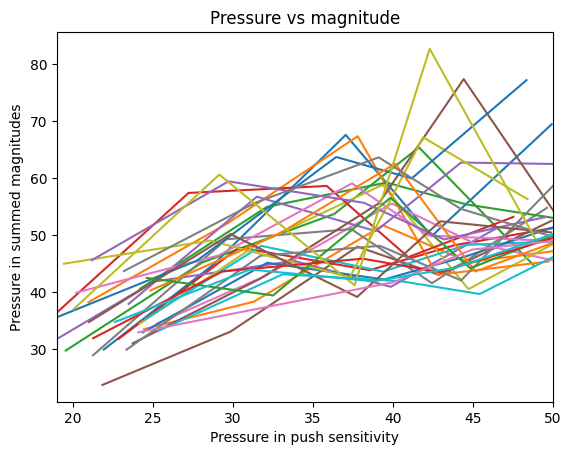

In [10]:
data=np.load("pressures1.npy")
CM=1
ST=0.2
for i in range(len(data)):
    plt.plot(data[:,1][i]/200,data[:,0][i])

plt.xlim([19,50])
plt.xlabel("Pressure in push sensitivity")
plt.ylabel("Pressure in summed magnitudes")
plt.title("Pressure vs magnitude")
plt.show()


## Modelling data 

In [11]:
vecs=np.load("vectors1.npy")

classes=data[:,1][0]/200
def find_nearest(array, value): #return class
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

SIZE=25
X_data=vecs[0:SIZE].reshape((len(vecs[0:SIZE])*vecs.shape[1],vecs.shape[2]*2))
y_data=data[:,1][0:SIZE].flatten()/200
y=[]
for i in range(len(X_data)):
    ax=np.zeros((5,))
    ax[i%5]=1
    y.append(ax)
y=np.array(y)
print(X_data.shape)
print(y_data.shape)

(125, 168)
(125,)


In [12]:
reg = LinearRegression().fit(X_data, y_data)
print("Score on training",reg.score(X_data, y_data))
dist=0
for i in range(50):
    num=random.randint(0,4)
    n=random.randint(25,29)
    dat=vecs[n][num].reshape(1,vecs.shape[2]*2)
    #print("Predicted",reg.predict(np.array(dat)),"Actual:",data[:,1][n][num]/200)
    dist+=abs(data[:,1][n][num]/200-reg.predict(np.array(dat)))
print("Average dist on unseen data:",dist/50)
#np.argmax(reg.predict(X_data),axis=1)

Score on training 1.0
Average dist on unseen data: [4.66852889]


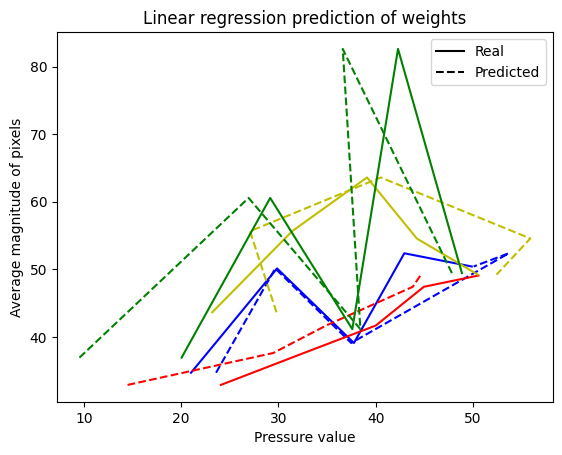

In [13]:
colours=["b","r","y","g","o"]
for i in range(4):
    n=25+i
    dat=vecs[n].reshape(5,vecs.shape[2]*2)
    x=data[:,0][n]
    p=reg.predict(np.array(dat))
    r=data[:,1][n]/200
    plt.plot(p,x,'--',c=colours[i])
    plt.plot(r,x,c=colours[i])


a = Line2D([0], [0], label='Real', color='black')
b = Line2D([0], [0], linestyle='--', label='Predicted', color='black')
plt.legend(handles=[a,b])
plt.title("Linear regression prediction of weights")
plt.ylabel("Average magnitude of pixels")
plt.xlabel("Pressure value")
plt.show()

# Speeds

(15, 4)


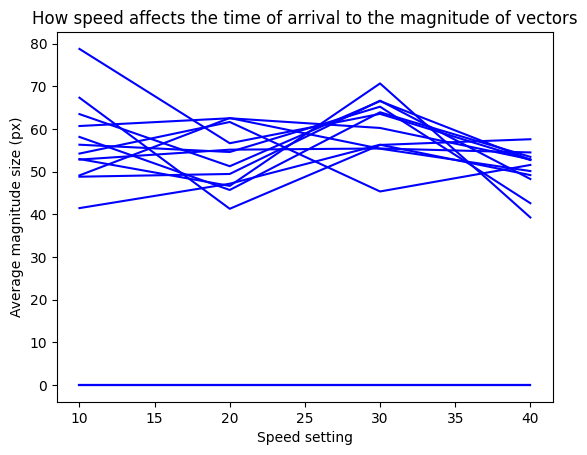

In [639]:
data=np.load("speeds1.npy")
speeds=[10,20,30,40] #speeds=[10,15,20,25,30]
for trial in range(data.shape[0]):
     plt.plot(speeds,data[trial],label="Exp"+str(trial),c="b")
print(data.shape)
plt.xlabel("Speed setting")
plt.ylabel("Average magnitude size (px)")
plt.title("How speed affects the time of arrival to the magnitude of vectors")
#plt.legend(loc="lower left")
plt.show()

## Regression model

In [640]:
vecs=np.load("speed_vectors1.npy")

SIZE=10
X_data=vecs[0:SIZE].reshape((len(vecs[0:SIZE])*vecs.shape[1],vecs.shape[2]*2))
y=np.zeros((len(vecs[0:SIZE])*vecs.shape[1]))
for i in range(len(y)):
    y[i]=speeds[i%len(speeds)]
print(X_data.shape)
print(y.shape)

(40, 152)
(40,)


In [641]:
speeds_reg = LinearRegression().fit(X_data, y)
print("Score on training",speeds_reg.score(X_data, y))
dist=0
for i in range(10,len(vecs)):
    n=random.randint(0,len(speeds)-1)
    vectors=vecs[i][n].reshape(1,vecs[i][n].shape[0]*2)
    speed=speeds[n]
    print("Predicted",speeds_reg.predict(vectors),"Actual:",speed)
    dist+=abs(speed-speeds_reg.predict(vectors))
print("Average dist on unseen data:",dist/len(vecs))

Score on training 1.0
Predicted [30.61579295] Actual: 40
Predicted [0.53062315] Actual: 10
Predicted [35.33304459] Actual: 30
Predicted [35.33304459] Actual: 10
Predicted [35.33304459] Actual: 30
Average dist on unseen data: [3.65684784]


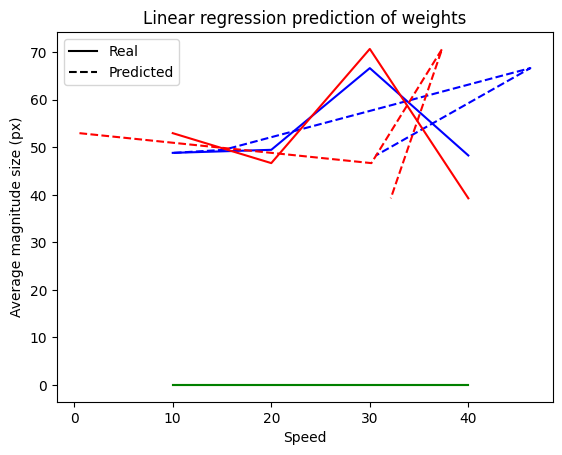

In [643]:
for i in range(4):
    n=10+i
    vectors=vecs[n].reshape(vecs[n].shape[0],vecs[n].shape[1]*2)
    x=data[n]
    p=speeds_reg.predict(vectors)
    plt.plot(p,x,'--',c=colours[i])
    plt.plot(speeds,x,c=colours[i])


a = Line2D([0], [0], label='Real', color='black')
b = Line2D([0], [0], linestyle='--', label='Predicted', color='black')
plt.legend(handles=[a,b])
plt.title("Linear regression prediction of weights")
plt.ylabel("Average magnitude size (px)")
plt.xlabel("Speed")
plt.show()